# Aviation Accident Risk Analysis
# 1.Business Understanding

This project analyzes aviation accident data to identify patterns and insights that can help stakeholders understand aviation risks. The company is expanding into the aviation industry to diversify its portfolio. However, it lacks knowledge about the potential risks associated with operating aircraft. 

- **Objectives**:  
  - Identify safest aircraft types.  
  - Analyze causes and trends in aviation accidents.  
  - Provide recommendations for improving safety.

This analysis will guide the stakeholders in making informed decisions, ensuring a safe and strategic entry into the aviation market.

# 2.Data Understanding.

This dataset, sourced from the National Transportation Safety Board, includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
The dataset provides information on aviation accidents, including key details about the incidents, aircraft, and conditions surrounding each event. 

The key features include:
- **Event Date:** When the incident occurred.  
- **Location and Country:** Where the event took place.  
- **Investigation Type:** Whether it was an accident or an incident.  
- **Make and Model:** The manufacturer and model of the aircraft involved.  
- **Aircraft Category:** Type of aircraft (e.g., passenger, cargo, etc.).  
- **Number of Engines:** Indicates the aircraft's configuration.  
- **Total Fatal Injuries:** Number of deaths.  
- **Total Serious/Minor Injuries:** Extent of non-fatal injuries.  
- **Total Uninjured:** Number of people who escaped unscathed.  
- **Purpose of Flight:** Purpose such as private, commercial, or military use.  
- **Weather Condition:** Conditions at the time of the incident (e.g., visual or instrument meteorological conditions).  
- **Broad Phase of Flight:** Stage of flight (e.g., takeoff, cruise, landing).  
- **Airport Code and Name:** Details if the event occurred near an airport.  
- **Latitude and Longitude:** Geographic coordinates of the incident.  

### Purpose:  
This dataset enables us to analyze aviation accidents for patterns, identify high-risk aircraft or conditions, and provide insights to guide safe and strategic business decisions in aviation operations.
**Tools**: Python (Pandas, Matplotlib, Seaborn). 

# 3. Data Preparation

## Data Cleaning 
First, we load the aviation accident dataset and inspect its structure. We are then going to clean it by handling issues such as missing data, standardizing column values and creating new columns if need be.   

In [1]:
#import necessary libraries that we need
import pandas as pd
import numpy as np

#load the dataset and inspect the first few rows
df = pd.read_csv('AviationData.csv', encoding = 'latin-1')
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8072\558676719.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding = 'latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
# Examine the dataset to understand its dimensions
#check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [3]:
#check the columns
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [4]:
#check for missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Before diving into analysis and visualizations, it is essential to clean the dataset. Raw data often contains missing values, inconsistencies, and irrelevant information that can affect the accuracy and quality of insights. Through data cleaning, we ensure the dataset is reliable and ready for meaningful analysis. We will do this by dropping any duplicates, handling the missing values and standardizing the columns to avoid any errors.

In [5]:
#we will then drop duplicates
df = df.drop_duplicates()

In [6]:
#standerdise the columns
df.columns = [col.strip().replace('.', '_').lower() for col in df.columns]

In [7]:
# Drop columns with more than 50% missing data
threshold = 0.5 * len(df)
df = df.loc[:, df.isnull().sum() <= threshold]

# Fill missing values for numeric columns with the mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [8]:
# Convert date columns to datetime
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

In [9]:
print(df.isnull().sum())

event_id                  0
investigation_type        0
accident_number           0
event_date                0
location                  0
country                   0
airport_code              0
airport_name              0
injury_severity           0
aircraft_damage           0
registration_number       0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
report_status             0
publication_date          0
dtype: int64


As you can see, our data is all cleaned up! Now we can use the data to visualize Now that the data has been cleaned and prepared, we can proceed to the visualization phase. This stage is crucial for uncovering patterns, trends, and insights within the data that might not be immediately apparent through raw numbers alone. Through effective visualizations, we aim to translate the cleaned data into meaningful stories and actionable insights.

### Trend of Aviation Accidents Over Time

In this section, we analyze the trend of aviation accidents over the years by plotting the number of accidents for each year. This helps us understand whether aviation safety has improved or declined over time.
We will do this by:

1. **Extracting the Year**:
   - From the `event_date` column, we extracted the year using the `dt.year` attribute. This allows us to group and count accidents by year.

2. **Counting Accidents by Year**:
   - We used `value_counts()` to count the number of accidents for each year and then sorted the index to ensure the years are in chronological order.

3. **Plotting the Trend**:
   - We plotted the number of accidents for each year using a line plot. A marker was added for each data point to make the trend easier to interpret.


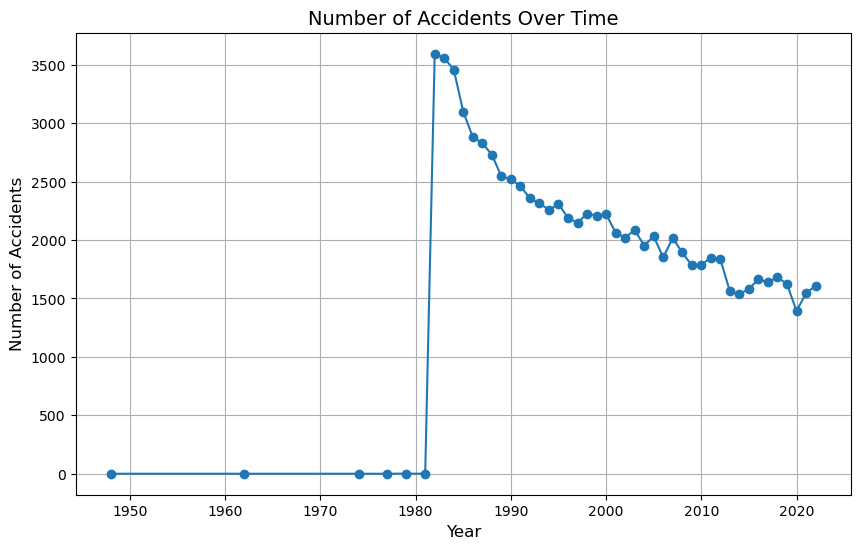

In [10]:
import matplotlib.pyplot as plt

# Extract year from the event_date
df['year'] = df['event_date'].dt.year

# Count accidents by year
accidents_by_year = df['year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='o')
plt.title('Number of Accidents Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()

## Accidents by Weather Condition
In this step, we create a bar chart to analyze the number of accidents under various weather conditions.
We will do this by:

1. **Counting Weather Conditions**:
   - The `value_counts()` function is used to count the occurrences of each unique weather condition in the dataset.

2. **Creating the Bar Chart**:
   - We use Matplotlib to plot a bar chart showing the number of accidents for each weather condition.
   - The chart is styled with a light blue color (`color='skyblue'`) and black edges to enhance visibility.

3. **Customizing Labels**:
   - The title (`'Accidents by Weather Condition'`), x-axis (`'Weather Condition'`), and y-axis (`'Number of Accidents'`) are labeled to clearly
     explain the chart's purpose.
   - X-axis labels are aligned horizontally (`rotation=12`) for readability.


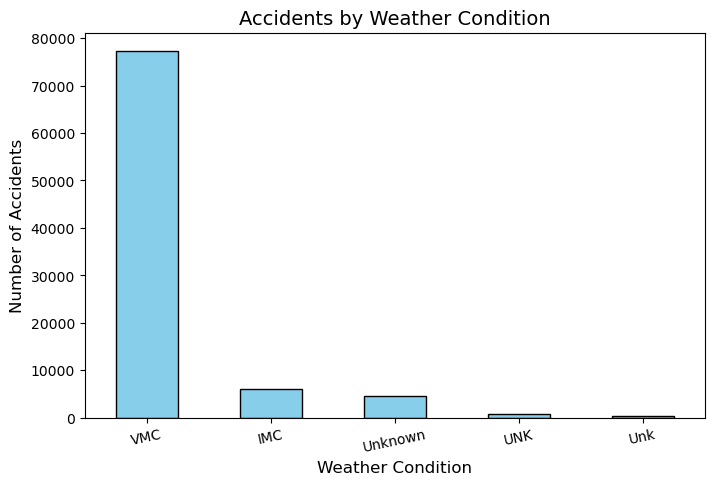

In [16]:
# Count accidents by weather condition
weather_counts = df['weather_condition'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Accidents by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=12)
plt.show()

### Correlation Heatmap of Injuries
Now, we want to see how different types of injuries (fatal, serious, minor, and uninjured) are related to each other in aviation accidents.

#### How do we do it?
1. **Find relationships between injuries**:
   - We calculate something called "correlation," which shows how strongly two things are connected:
     - **1** means highly correlated. If two types of injuries are highly correlated, it means they tend to happen together. For example, if
       fatal injuries happen, serious injuries are likely to happen too.
     - **0** means no correlation. If the number doesn’t show a clear pattern, it means one injury type doesn't necessarily happen when another
       type happens.
     - **-1** means negative correlation.(one goes up while the other goes down.) If one injury type goes up and the other goes down.

2. **Show it as a heatmap**:
   - A heatmap is like a colorful table that shows these relationships.
   - Colors help us see strong and weak connections easily.
   - The `coolwarm` colormap highlights the strength of relationships, with warm colors indicating positive correlation and cool colors
     indicating negative correlation.



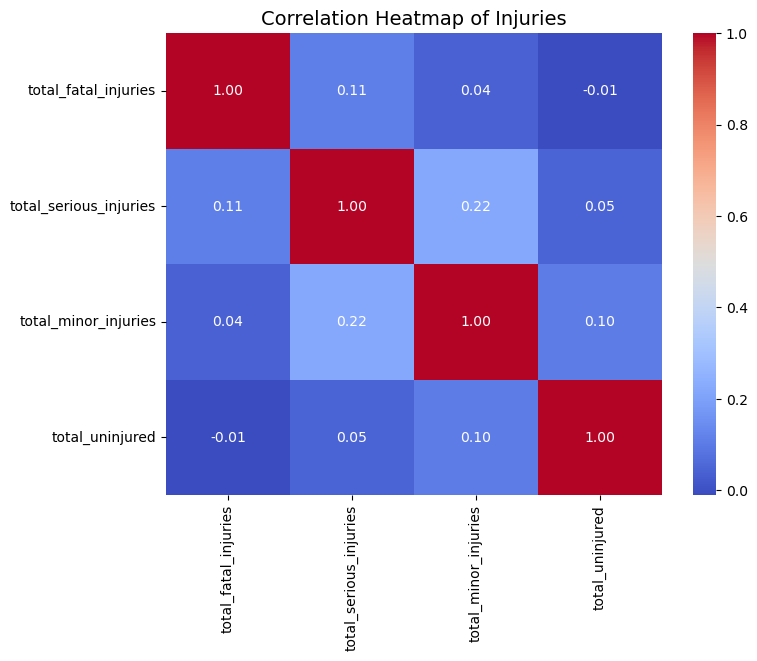

In [13]:
# Calculate correlation between numerical columns
correlation_matrix = df[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Injuries', fontsize=14)
plt.show()

## Summary
This dataset contains records of aviation accidents, including details about the event date, location, injury severity, weather conditions, and aircraft information.The analysis revealed trends in the number of accidents over time, the impact of weather conditions on accident frequency, and the correlation between different types of injuries. Visualizations were used to highlight these insights. This analysis helps to better understand aviation accident patterns and may guide safety improvements and further investigations.